In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

##Q1 importing Local dataset
df = pd.read_excel(r'C:\Users\shaun.rolph\Desktop\Assignmenttwo\FEA2020.xlsx', sheet_name='FEA')
print(df)

         FIPS State.x County.x  LACCESS_POP10  LACCESS_POP15  \
0      1001.0      AL  Autauga   18428.439685   17496.693038   
1      1003.0      AL  Baldwin   35210.814078   30561.264430   
2      1005.0      AL  Barbour    5722.305602    6069.523628   
3      1007.0      AL     Bibb    1044.867327     969.378841   
4      1009.0      AL   Blount    1548.175559    3724.428242   
...       ...     ...      ...            ...            ...   
3221  72131.0     NaN      NaN            NaN            NaN   
3222  72137.0     NaN      NaN            NaN            NaN   
3223  72143.0     NaN      NaN            NaN            NaN   
3224  72151.0     NaN      NaN            NaN            NaN   
3225  46102.0     NaN      NaN            NaN            NaN   

      PCH_LACCESS_POP_10_15  PCT_LACCESS_POP10  PCT_LACCESS_POP15  \
0                 -5.056026          33.769657          32.062255   
1                -13.204891          19.318473          16.767489   
2                  6.067

In [140]:

## Q1 subset creation

## CT_LACCESS_POP15 (% of population with low access to stores)
## GROCPTH16 (grocery stores/1,000 pop)
## GROCPTH16(grocery stores/1,000 pop)
## METRO13 (metro status)
## MEDHHINC15 (median household income)
## RECFACPTH16 (rec facilities/1,000 pop)
## PCT_DIABETES_ADULTS13 (adult diabetes rate)
## Pop2020* (Census populations)



df = pd.DataFrame(df, columns=['PCT_LACCESS_POP15', 'GROCPTH16', 'FFRPTH16', 'METRO13', 'MEDHHINC15', 'RECFACPTH16', 'PCT_DIABETES_ADULTS13', 'Pop2020', 'FIPS', 'State.x', 'County.x', 'State.y', 'County.y'])
df.head()

,PCT_LACCESS_POP15,GROCPTH16,FFRPTH16,METRO13,MEDHHINC15,RECFACPTH16,PCT_DIABETES_ADULTS13,Pop2020,FIPS,State.x,County.x,State.y,County.y
0,32.062255,0.054271,0.795977,1.0,56580.0,0.108542,13.0,58805.0,1001.0,AL,Autauga,1.0,1.0
1,16.767489,0.139753,0.751775,1.0,52387.0,0.101200,10.4,231767.0,1003.0,AL,Baldwin,1.0,3.0
2,22.105560,0.155195,0.892372,0.0,31433.0,0.000000,18.4,25223.0,1005.0,AL,Barbour,1.0,5.0
3,4.230324,0.220916,0.309283,1.0,40767.0,0.044183,14.8,22293.0,1007.0,AL,Bibb,1.0,7.0
4,6.497380,0.086863,0.399569,1.0,50487.0,0.069490,14.1,59134.0,1009.0,AL,Blount,1.0,9.0


In [141]:
## Q1A Making DF for just variables to be histogramed

df_Histograms = pd.DataFrame(df, columns=['PCT_LACCESS_POP15', 'GROCPTH16', 'FFRPTH16', 'METRO13', 'MEDHHINC15', 'RECFACPTH16', 'PCT_DIABETES_ADULTS13', 'Pop2020', 'FIPS'])
df.head()

,PCT_LACCESS_POP15,GROCPTH16,FFRPTH16,METRO13,MEDHHINC15,RECFACPTH16,PCT_DIABETES_ADULTS13,Pop2020,FIPS,State.x,County.x,State.y,County.y
0,32.062255,0.054271,0.795977,1.0,56580.0,0.108542,13.0,58805.0,1001.0,AL,Autauga,1.0,1.0
1,16.767489,0.139753,0.751775,1.0,52387.0,0.101200,10.4,231767.0,1003.0,AL,Baldwin,1.0,3.0
2,22.105560,0.155195,0.892372,0.0,31433.0,0.000000,18.4,25223.0,1005.0,AL,Barbour,1.0,5.0
3,4.230324,0.220916,0.309283,1.0,40767.0,0.044183,14.8,22293.0,1007.0,AL,Bibb,1.0,7.0
4,6.497380,0.086863,0.399569,1.0,50487.0,0.069490,14.1,59134.0,1009.0,AL,Blount,1.0,9.0


In [142]:
## Q1A Making DF for just variables to be histogramed

# Function to create histograms for each column
def create_histograms(df_Histograms, log=False):
    
    # Determine the number of columns in the DataFrame
    num_columns = df_Histograms.shape[1]
    
    # Define the number of rows and columns for subplots
    num_rows = int(np.ceil(num_columns**0.5))
    num_cols = int(np.ceil(num_columns / num_rows))
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    
    # Flatten the axes if num_rows and num_cols are not the same
    axes = axes.flatten()
    
    # Create histograms for each column
    for i in range(num_columns):
        ax = axes[i]
        column_data = df.iloc[:, i]
        ax.hist(column_data, bins=20, color='blue', alpha=0.7)
        ax.set_title(df.columns[i])
        
        if log:
            ax.set_yscale('log')
    
    # Hide any extra empty subplots
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.show()




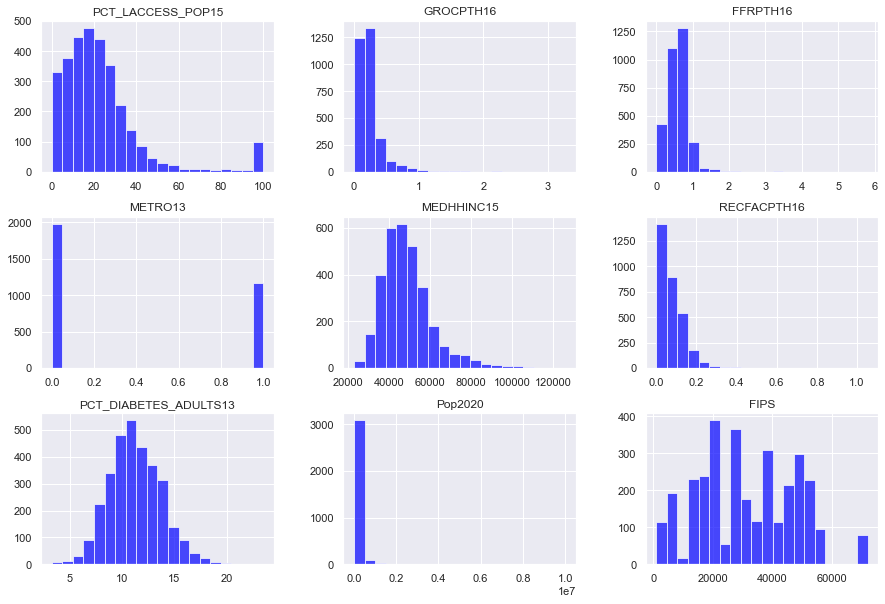

In [143]:
## Q1A
# create regular histograms
create_histograms(df_Histograms)

## PCT_LACCESS_POP15 looks heavily skewed towards the left side of the distribution with some clear ciritical observations on the far right side of the tail in the distribution.
## It would very much be worth breakdown the fibs codes on the right tail of the distribution. 

## RECFACPTH16 has a central base within the distribution and then outliers in the higher quartile of the distribution. But PCT_LACCESS_POP15 just from looking at the histogram looks to be the most skewed results. 

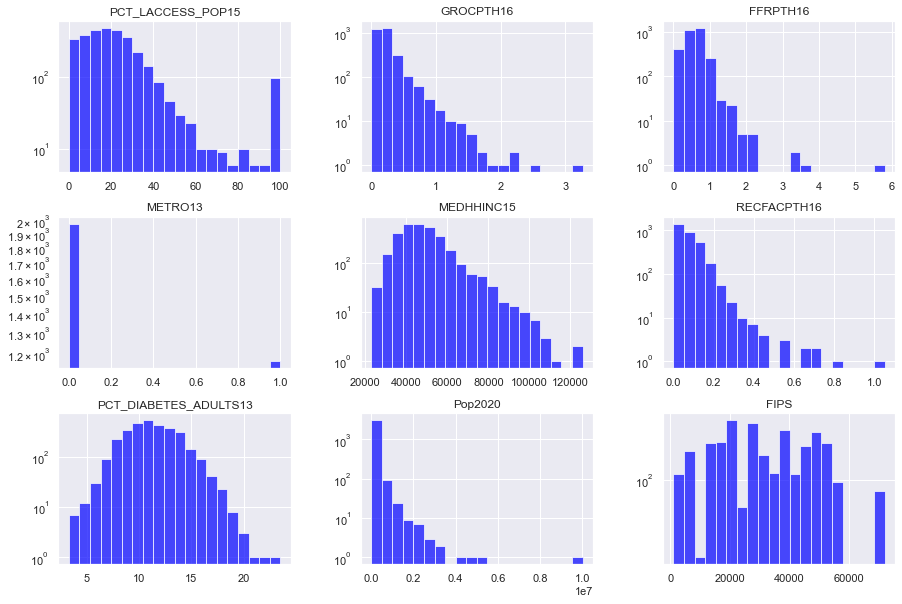

In [144]:
## Q1A
# create log histograms
create_histograms(df_Histograms, log=True)

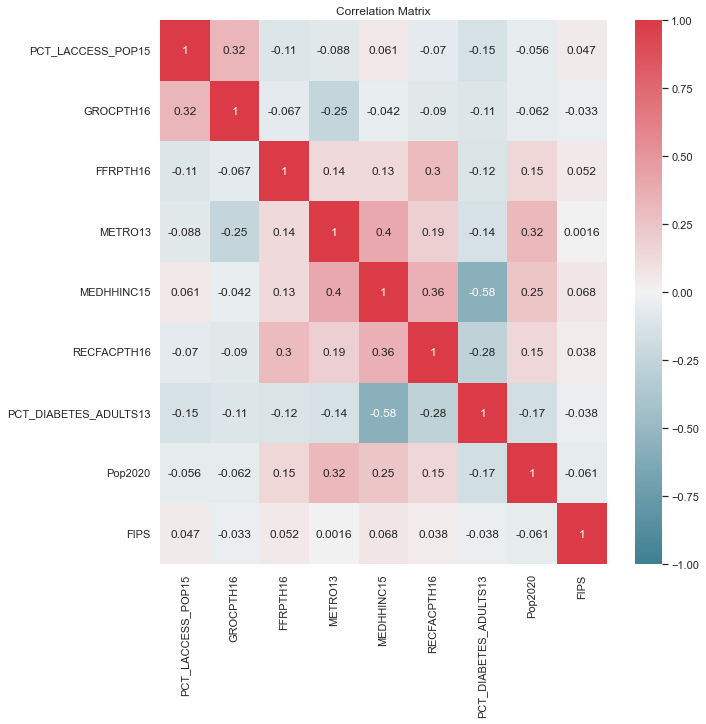

In [145]:

## Q1b
# Calculate the correlation matrix
correlation_matrix = df_Histograms.corr()

# Define the color map for positive and negative correlations
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)

# Customize the plot 
plt.title('Correlation Matrix')

# Show the plot
plt.show()


In [146]:
## Q1b
# Find the strongest correlating variables
max_corr = 0  # Initialize the maximum correlation value
strongest_pairs = []  # Initialize a list to store the strongest pairs

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > max_corr:
            max_corr = abs(correlation_matrix.iloc[i, j])
            strongest_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j])]
        elif abs(correlation_matrix.iloc[i, j]) == max_corr:
            strongest_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("The strongest correlating variables are:")
for pair in strongest_pairs:
    print(f"{pair[0]} and {pair[1]} with a correlation of {correlation_matrix.loc[pair[0], pair[1]]}")



The strongest correlating variables are:
MEDHHINC15 and PCT_DIABETES_ADULTS13 with a correlation of -0.5752571563655025


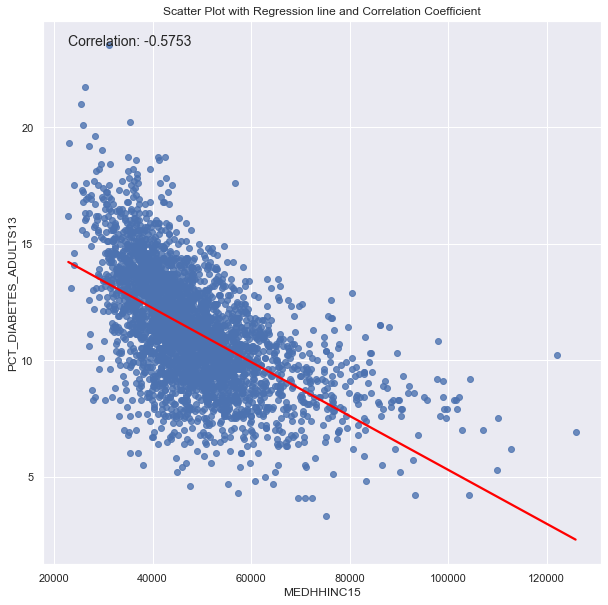

In [147]:
## Q2A
# Specify the names of the columns you want to use for the scatter plot
x_column =  'MEDHHINC15'
y_column =  'PCT_DIABETES_ADULTS13'

# Calculate the correlation coefficient
corr_coefficient = df_Histograms[x_column].corr(df_Histograms[y_column])

# Create a scatter plot with a trendline
plt.figure(figsize=(10, 10))
sns.regplot(x=x_column, y=y_column, data=df_Histograms, ci=None, line_kws={'color': 'red'})

# Display the correlation coefficient as text
plt.text(np.min(df_Histograms[x_column]), np.max(df_Histograms[y_column]), f'Correlation: {corr_coefficient:.4f}', fontsize=14)

# Customize the plot
plt.title('Scatter Plot with Regression line and Correlation Coefficient')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Show the plot
plt.show()


In [148]:
## Q2b
dfresult = df.dropna(subset=['MEDHHINC15', 'PCT_DIABETES_ADULTS13'])
print(dfresult)



      PCT_LACCESS_POP15  GROCPTH16  FFRPTH16  METRO13  MEDHHINC15  \
0             32.062255   0.054271  0.795977      1.0     56580.0   
1             16.767489   0.139753  0.751775      1.0     52387.0   
2             22.105560   0.155195  0.892372      0.0     31433.0   
3              4.230324   0.220916  0.309283      1.0     40767.0   
4              6.497380   0.086863  0.399569      1.0     50487.0   
...                 ...        ...       ...      ...         ...   
3138          43.224074   0.090406  0.700644      0.0     71867.0   
3139          29.174370   0.474547  0.862813      0.0     83290.0   
3140          22.189685   0.096567  0.820820      0.0     62968.0   
3141          10.915407   0.244260  0.732780      0.0     56088.0   
3142          17.165192   0.555710  0.555710      0.0     60986.0   

      RECFACPTH16  PCT_DIABETES_ADULTS13   Pop2020     FIPS State.x  \
0        0.108542                   13.0   58805.0   1001.0      AL   
1        0.101200            

In [149]:
## Q2b

# Specify the names of the columns you want to use for the regression
x_column_name = 'MEDHHINC15'
y_column_name = 'PCT_DIABETES_ADULTS13'

# Extract the columns from the DataFrame
x_column = dfresult[x_column_name]
y_column = dfresult[y_column_name]

# Add a constant term to the independent variable (X)
X = sm.add_constant(x_column)

# Fit the linear regression model
model = sm.OLS(y_column, X).fit()

# Get the regression summary
summary = model.summary()

# Print the regression summary
print(summary)


                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.331
Model:                               OLS   Adj. R-squared:                  0.331
Method:                    Least Squares   F-statistic:                     1552.
Date:                   Fri, 27 Oct 2023   Prob (F-statistic):          4.52e-276
Time:                           16:57:32   Log-Likelihood:                -6677.1
No. Observations:                   3139   AIC:                         1.336e+04
Df Residuals:                       3137   BIC:                         1.337e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8571 

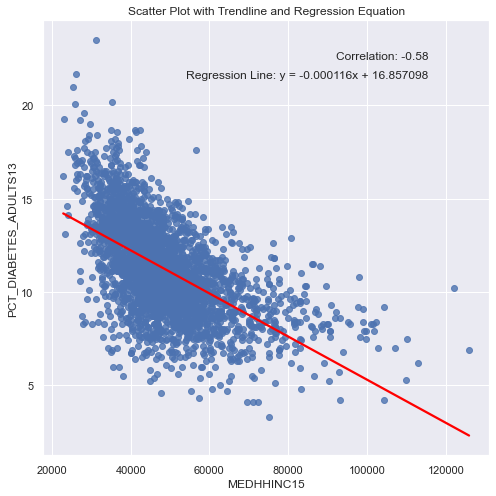

In [150]:

## Q2c
# Specify the names of the columns you want to use for the scatter plot
x_column = 'MEDHHINC15'
y_column = 'PCT_DIABETES_ADULTS13'

# Calculate the correlation coefficient
corr_coefficient = dfresult[x_column].corr(dfresult[y_column])

# Calculate the regression equation
slope, intercept, r_value, p_value, std_err = stats.linregress(dfresult[x_column], dfresult[y_column])
regression_equation = f'Regression Line: y = {slope:.6f}x + {intercept:.6f}'

# Create a scatter plot with a trendline
plt.figure(figsize=(8, 8))
sns.regplot(x=x_column, y=y_column, data=df, ci=None, line_kws={'color': 'red'})

# Display the correlation coefficient and regression equation further up in the top right corner
plt.text(np.max(dfresult[x_column]) - 0.1 * (np.max(dfresult[x_column]) - np.min(dfresult[x_column])),
         np.max(dfresult[y_column]) - 0.05 * (np.max(dfresult[y_column]) - np.min(dfresult[y_column])),
         f'Correlation: {corr_coefficient:.2f}', fontsize=12, horizontalalignment='right')
plt.text(np.max(dfresult[x_column]) - 0.1 * (np.max(dfresult[x_column]) - np.min(dfresult[x_column])),
         np.max(dfresult[y_column]) - 0.1 * (np.max(dfresult[y_column]) - np.min(dfresult[y_column])),
         regression_equation, fontsize=12, horizontalalignment='right')

# Customize the plot (optional)
plt.title('Scatter Plot with Trendline and Regression Equation')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Show the plot
plt.show()


In [151]:
## Q2d

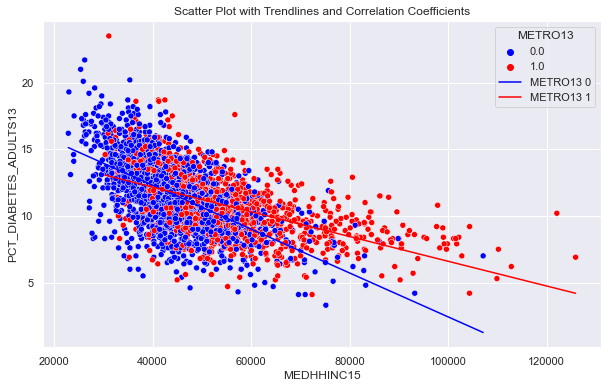

In [152]:
## Q2e

# Assuming you have already loaded the 'dfresult' DataFrame

# Specify the names of the columns you want to use for the scatter plot
x_column = 'MEDHHINC15'
y_column = 'PCT_DIABETES_ADULTS13'

# Calculate and display the correlation coefficients as text
corr_coefficient_0 = dfresult[dfresult['METRO13'] == 0][x_column].corr(dfresult[dfresult['METRO13'] == 0][y_column])
corr_coefficient_1 = dfresult[dfresult['METRO13'] == 1][x_column].corr(dfresult[dfresult['METRO13'] == 1][y_column])

# Calculate the regression equation for each category
slope_0, intercept_0, _, _, _ = stats.linregress(dfresult[dfresult['METRO13'] == 0][x_column], dfresult[dfresult['METRO13'] == 0][y_column])
slope_1, intercept_1, _, _, _ = stats.linregress(dfresult[dfresult['METRO13'] == 1][x_column], dfresult[dfresult['METRO13'] == 1][y_column])

# Create a scatter plot with separate trendlines and colors for each category
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_column, y=y_column, hue='METRO13', data=dfresult, palette={0: 'blue', 1: 'red'})
sns.lineplot(x=dfresult[dfresult['METRO13'] == 0][x_column], y=slope_0 * dfresult[dfresult['METRO13'] == 0][x_column] + intercept_0, color='blue', label='METRO13 0')
sns.lineplot(x=dfresult[dfresult['METRO13'] == 1][x_column], y=slope_1 * dfresult[dfresult['METRO13'] == 1][x_column] + intercept_1, color='red', label='METRO13 1')

# Customize the plot (optional)
plt.title('Scatter Plot with Trendlines and Correlation Coefficients')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend(title='METRO13')

# Show the plot
plt.show()


In [153]:
## Q2e

# Specify the names of the columns you want to use for the scatter plot and regression analysis
x_column = 'MEDHHINC15'
y_column = 'PCT_DIABETES_ADULTS13'
categorical_variable = 'METRO13'


# Calculate the regression equation for each category
X = sm.add_constant(dfresult[[x_column, categorical_variable]])  # Add a constant for the intercept
model = sm.OLS(dfresult[y_column], X)
results = model.fit()

# Display regression results
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.340
Model:                               OLS   Adj. R-squared:                  0.339
Method:                    Least Squares   F-statistic:                     806.1
Date:                   Fri, 27 Oct 2023   Prob (F-statistic):          3.36e-283
Time:                           16:57:35   Log-Likelihood:                -6656.8
No. Observations:                   3139   AIC:                         1.332e+04
Df Residuals:                       3136   BIC:                         1.334e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0584 

In [155]:
## Q2e
# Specify the names of the columns you want to use for the scatter plot and regression analysis
x_column = 'MEDHHINC15'
y_column = 'PCT_DIABETES_ADULTS13'
categorical_variable = 'METRO13'
additional_vars = ['FFRPTH16', 'RECFACPTH16']  # Add the names of the additional independent variables

# Calculate the regression equation for each category
X = sm.add_constant(dfresult[[x_column, categorical_variable] + additional_vars])  # Include the additional independent variables
model = sm.OLS(dfresult[y_column], X)
results = model.fit()

# Display regression results
print(results.summary())




                              OLS Regression Results                             
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.348
Model:                               OLS   Adj. R-squared:                  0.347
Method:                    Least Squares   F-statistic:                     418.6
Date:                   Fri, 27 Oct 2023   Prob (F-statistic):          2.58e-289
Time:                           17:05:06   Log-Likelihood:                -6635.9
No. Observations:                   3139   AIC:                         1.328e+04
Df Residuals:                       3134   BIC:                         1.331e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          17.11